# Descarga de históricos de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Entonces, en la clase anterior vimos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> Estas medidas se pueden calcular cuando tenemos escenarios probables de la economía y conocemos sus probabilidades de ocurrencia. Ahora, si no conocemos dichos escenarios, ¿qué podemos hacer?

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.csv`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 a hoy y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [8]:
# Importamos pandas
import pandas as pd
%matplotlib inline

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [2]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

In [3]:
# Cargamos hoja de calculo en un dataframe


#### Anotación #1
- Quisieramos indizar por fecha.

In [9]:
# Cargamos hoja de calculo en un dataframe
closes = pd.read_csv('precios/AAPL.csv', 
                     index_col='Date'
                    )

In [10]:
closes.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.454300,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.624336,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.633545,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,99.002556,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,102.806480,59364500


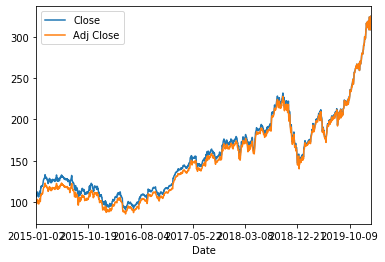

In [11]:
# Graficar precios de cierre y precios de cierre ajustados
closes[['Close', 'Adj Close']].plot();

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [12]:
# Cargamos hoja de calculo en un dataframe
closes = pd.read_csv('precios/AAPL.csv', 
                     index_col='Date',
                     usecols=['Date', 'Adj Close']
                    )

In [13]:
closes

,Adj Close
Date,
2015-01-02,100.454300
2015-01-05,97.624336
2015-01-06,97.633545
2015-01-07,99.002556
2015-01-08,102.806480
...,...
2020-01-31,309.510010
2020-02-03,308.660004
2020-02-04,318.850006


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,GFNORTEO.MX,GFINBURO.MX) y contengan los datos de precio de cierre.

In [16]:
AAPL = pd.read_csv('precios/AAPL.csv', 
                   usecols=['Date', 'Adj Close'],
                   index_col='Date'
                  )
AMZN = pd.read_csv('precios/AMZN.csv', 
                   usecols=['Date', 'Adj Close'],
                   index_col='Date'
                  )

AAPL.rename(columns={'Adj Close': 'AAPL'}, inplace=True)
AMZN.rename(columns={'Adj Close': 'AMZN'}, inplace=True)

In [17]:
closes = AAPL.join(AMZN)

In [18]:
closes.head()

,AAPL,AMZN
Date,,
2015-01-02,100.454300,308.519989
2015-01-05,97.624336,302.190002
2015-01-06,97.633545,295.290009
2015-01-07,99.002556,298.420013
2015-01-08,102.806480,300.459991


In [19]:
closes.tail()

,AAPL,AMZN
Date,,
2020-01-31,309.510010,2008.719971
2020-02-03,308.660004,2004.199951
2020-02-04,318.850006,2049.669922
2020-02-05,321.450012,2039.869995
2020-02-06,325.209991,2050.229980


## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [20]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas_datareader.data as web

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [21]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: necesita registrarse para obtener un api key.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [24]:
# Ejemplo yahoo
web.DataReader(['AAPL', 'AMZN', 'NFLX', 'TSLA'],
               data_source='yahoo',
               start='2015-01-01'
              )

Attributes   Adj Close                                            Close  \
Symbols           AAPL         AMZN        NFLX        TSLA        AAPL   
Date                                                                      
2015-01-02  100.454300   308.519989   49.848572  219.309998  109.330002   
2015-01-05   97.624336   302.190002   47.311428  210.089996  106.250000   
2015-01-06   97.633545   295.290009   46.501427  211.279999  106.260002   
2015-01-07   99.002556   298.420013   46.742859  210.949997  107.750000   
2015-01-08  102.806480   300.459991   47.779999  210.619995  111.889999   
...                ...          ...         ...         ...         ...   
2020-02-03  308.660004  2004.199951  358.000000  780.000000  308.660004   
2020-02-04  318.850006  2049.669922  369.010010  887.059998  318.850006   
2020-02-05  321.450012  2039.869995  369.670013  734.700012  321.450012   
2020-02-06  325.209991  2050.229980  366.950012  748.960022  325.209991   
2020-02-07  320.029999  2079.280029  366.769989  748.070007  320.029999   

Attributes                                             High               ...  \
Symbols            AMZN        NFLX        TSLA        AAPL         AMZN  ...   
Date                                                                      ...   
2015-01-02   308.519989   49.848572  219.309998  111.440002   314.750000  ...   
2015-01-05   302.190002   47.311428  210.089996  108.650002   308.380005  ...   
2015-01-06   295.290009   46.501427  211.279999  107.430000   303.000000  ...   
2015-01-07   298.420013   46.742859  210.949997  108.199997   301.279999  ...   
2015-01-08   300.459991   47.779999  210.619995  112.150002   303.140015  ...   
...                 ...         ...         ...         ...          ...  ...   
2020-02-03  2004.199951  358.000000  780.000000  313.489990  2048.500000  ...   
2020-02-04  2049.669922  369.010010  887.059998  319.640015  2059.800049  ...   
2020-02-05  2039.869995  369.670013  734.700012  324.760010  2071.020020  ...   
2020-02-06  2050.229980  366.950012  748.960022  325.220001  2056.300049  ...   
2020-02-07  2079.280029  366.769989  748.070007  323.399689  2098.530029  ...   

Attributes         Low                    Open                           \
Symbols           NFLX        TSLA        AAPL         AMZN        NFLX   
Date                                                                      
2015-01-02   48.731430  213.259995  111.389999   312.579987   49.151428   
2015-01-05   47.147144  207.160004  108.290001   307.010010   49.258572   
2015-01-06   45.661430  204.210007  106.540001   302.239990   47.347141   
2015-01-07   46.271427  209.779999  107.199997   297.500000   47.347141   
2015-01-08   46.478573  210.009995  109.230003   300.320007   47.119999   
...                ...         ...         ...          ...         ...   
2020-02-03  346.279999  673.520020  304.299988  2010.599976  347.239990   
2020-02-04  356.100006  833.880005  315.309998  2029.880005  361.000000   
2020-02-05  362.299988  704.109985  323.519989  2071.020020  375.130005   
2020-02-06  362.510010  687.000000  322.570007  2041.020020  369.600006   
2020-02-07  363.570007  730.010010  322.369995  2041.989990  365.040009   

Attributes                  Volume                                     
Symbols           TSLA        AAPL       AMZN        NFLX        TSLA  
Date                                                                   
2015-01-02  222.869995  53204600.0  2783200.0  13475000.0   4764400.0  
2015-01-05  214.550003  64285500.0  2774200.0  18165000.0   5368500.0  
2015-01-06  210.059998  65797100.0  3519000.0  16037700.0   6261900.0  
2015-01-07  213.350006  40105900.0  2640300.0   9849700.0   2968400.0  
2015-01-08  212.809998  59364500.0  3088400.0   9601900.0   3442500.0  
...                ...         ...        ...         ...         ...  
2020-02-03  673.690002  43496400.0  5899100.0   6674900.0  47233500.0  
2020-02-04  882.960022  34154100.0  5289300

Sin embargo no se pueden descargar varios a la vez. Intentémoslo hacer nosotros así sea de manera rudimentaria:

In [25]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

In [26]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
closes = get_adj_closes(tickers=['AAPL', 'MSFT', 'NVDA', '^GSPC'],
                        start_date='2015-01-01'
                       )
closes.head()

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,100.454300,41.979183,19.406757,2058.199951
2015-01-05,97.624336,41.593143,19.078981,2020.579956
2015-01-06,97.633545,40.982681,18.500534,2002.609985
2015-01-07,99.002556,41.503380,18.452328,2025.900024
2015-01-08,102.806480,42.724323,19.146456,2062.139893


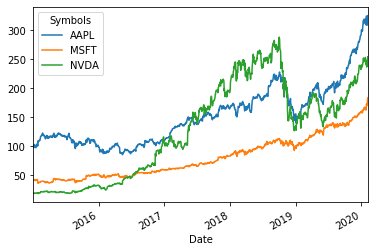

In [28]:
# Gráfico
closes[['AAPL', 'MSFT', 'NVDA']].plot()

**Conclusión**
- Aprendimos a importar datos desde archivos locales.
- Aprendimos a importar datos remotamente con el paquete pandas_datareader.

¿Ahora qué? Pues con estos históricos, obtendremos los rendimientos y ellos nos servirán como base para caracterizar la distribución de rendimientos... 

### ¡Oh, si!

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>